**This notebook will be mainly used for the capstone project.**

# Capstone Project: Ideal Location for Vending Machines in Boston using Data Science

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from scipy.spatial.distance import cdist
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
address = 'Boston, Massachusetts'
geolocator = Nominatim(user_agent="boston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [4]:
!wget -O Boston_LonLat.csv 'https://raw.githubusercontent.com/slagwankar/Coursera_Capstone/master/Boston%20LonLat.csv'
Boston_LonLat= pd.read_csv('https://raw.githubusercontent.com/slagwankar/Coursera_Capstone/master/Boston%20LonLat.csv')
Boston_LonLat

--2019-09-09 00:52:39--  https://raw.githubusercontent.com/slagwankar/Coursera_Capstone/master/Boston%20LonLat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1060 (1.0K) [text/plain]
Saving to: ‘Boston_LonLat.csv’

100%[======================================>] 1,060       --.-K/s   in 0s      

2019-09-09 00:52:39 (114 MB/s) - ‘Boston_LonLat.csv’ saved [1060/1060]



,Borough,Neighborhood,Latitude,Longitude
0,Boston,Jamaica Plain,42.310871,-71.125061
1,Boston,Leather District,42.347960,-71.056410
2,Boston,Back Bay,42.350266,-71.080978
3,Boston,Bay Village,42.350150,-71.065190
4,Boston,Downtown,42.355300,-71.055280
5,Boston,Roxbury,42.317982,-71.158508
6,Boston,Fenway,42.332670,-71.097910
7,Boston,Chinatown,42.347960,-71.056410
8,Boston,West Roxbury,42.278870,-71.159390
9,Boston,Beacon Hill,42.360291,-71.068680


In [5]:
# create map of Boston using latitude and longitude values
boston_map = folium.Map(location=[latitude, longitude], zoom_start=11.5)
# add markers to map
for lat, lng, label in zip(Boston_LonLat['Latitude'], Boston_LonLat['Longitude'], Boston_LonLat['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(boston_map)
boston_map

In [6]:
radius=400
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [7]:
#@hidden cell 
CLIENT_ID = 'HA4Z0TIBZUR0O3AK3HBHLHDMLCNRO1SEXFLEIOCQUD3NSXEN' # your Foursquare ID
CLIENT_SECRET = 'IFZBFXERM4E2VUNPI4SSBVB0HAC5QQGBNPVXAB4EAMIP4QJE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [8]:
boston_venues = getNearbyVenues(names=Boston_LonLat['Neighborhood'],latitudes=Boston_LonLat['Latitude'],longitudes=Boston_LonLat['Longitude'])

Jamaica Plain
Leather District
Back Bay
Bay Village
Downtown
Roxbury
Fenway
Chinatown
West Roxbury
Beacon Hill
Roslindale
North End
East Boston
Brighton
Mission Hill
Dorchester
Mattapan
Longwood Medical Area
South End
South Boston
Charlestown
South Boston Waterfront
Harbor Islands
Hyde Park
West End
Allston


In [9]:
boston_venues=boston_venues.rename(columns={'Venue Category':'VCategory'})
boston_venues.VCategory

0                                 Café
1                                Diner
2                       Sandwich Place
3                             Wine Bar
4                     Sushi Restaurant
5                                  Spa
6                    French Restaurant
7                   Dim Sum Restaurant
8                     Greek Restaurant
9                          Salad Place
10                                Park
11                               Hotel
12                           Pet Store
13                   Electronics Store
14                      Ice Cream Shop
15                      Ice Cream Shop
16                        Cycle Studio
17                  Athletics & Sports
18                          Steakhouse
19                  Seafood Restaurant
20                      Cosmetics Shop
21                      Chocolate Shop
22                   French Restaurant
23              Furniture / Home Store
24                         Salad Place
25                       

In [10]:
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('African Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('American Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Asian Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('BBQ Joint')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Bagel Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Bakery')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Belgian Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Bistro')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Brazilian Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Breakfast Spot')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Bubble Tea Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Burger Joint')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Burrito Place')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Café')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Chinese Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Chocolate Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Coffee Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Comfort Food Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Convenience Store')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Deli / Bodega')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Dessert Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Dim Sum Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Diner')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Donut Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Dumpling Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Falafel Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Fast Food Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Fish & Chips Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Food')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('French Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Fried Chicken Joint')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Frozen Yogurt Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Gastropub')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Gourmet Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Greek Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Grocery')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Hot Dog Joint')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Hotpot Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Ice Cream Shop')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Indian Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Italian Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Japanese Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Korean Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Latin American Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Mediterranean Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Mexican Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('New American Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Noodle House')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Pizza Place')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Salad Place')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Sandwich Place')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Seafood Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Szechuan Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Southern / Soul Food Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Steakhouse')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Street Food Gathering')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Sushi Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Taco Place')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Thai Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Vegetarian / Vegan Restaurant')]
boston_venues=boston_venues[~boston_venues.VCategory.str.contains('Vietnamese Restaurant')]
boston_venues.shape
boston_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VCategory
3,Leather District,42.347960,-71.056410,Les Zygomates Wine Bar Bistro,42.351254,-71.057344,Wine Bar
5,Leather District,42.347960,-71.056410,Happy Feet Spa,42.350965,-71.058375,Spa
10,Back Bay,42.350266,-71.080978,Commonwealth Avenue Mall,42.351887,-71.080033,Park
11,Back Bay,42.350266,-71.080978,The Lenox Hotel,42.349229,-71.079528,Hotel
12,Back Bay,42.350266,-71.080978,The Fish & Bone,42.350022,-71.081334,Pet Store
13,Back Bay,42.350266,-71.080978,Apple Boylston Street,42.348906,-71.082382,Electronics Store
16,Back Bay,42.350266,-71.080978,Turnstyle Cycle,42.349059,-71.081865,Cycle Studio
17,Back Bay,42.350266,-71.080978,Boston Marathon Finish Line,42.349842,-71.078691,Athletics & Sports
20,Back Bay,42.350266,-71.080978,LUSH,42.350573,-71.078642,Cosmetics Shop
23,Back Bay,42.350266,-71.080978,Crate and Barrel,42.349290,-71.081390,Furniture / Home Store


In [11]:
venue_count=boston_venues.groupby('Neighborhood').count()
venue_count=venue_count.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','VCategory'])
venue_count=venue_count.reset_index()
venue_count=venue_count.rename(columns={'Venue':'Number of Venues'})
venue_count=venue_count.sort_values(by='Number of Venues', ascending=False)

Text(0.5, 1.0, 'Number of Ideal Venues in Boston Neighborhoods')

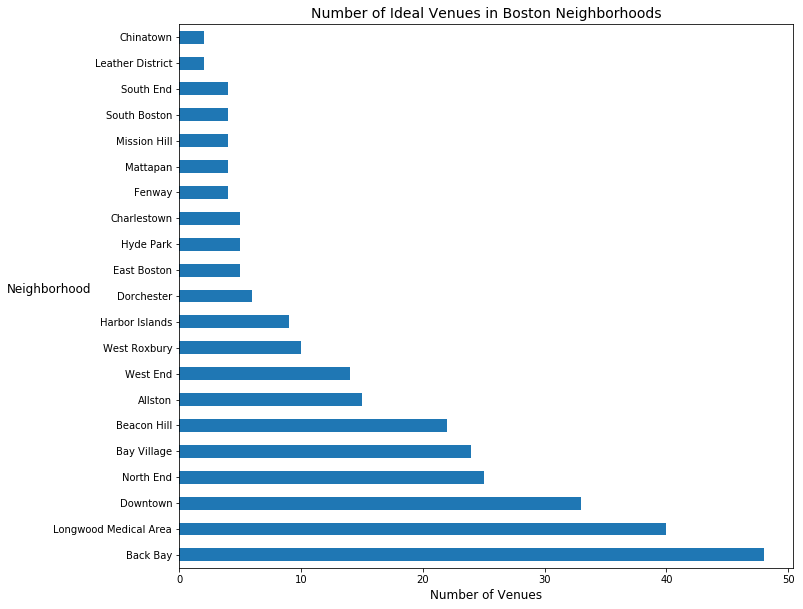

In [12]:
venue_count = venue_count.plot.barh(x='Neighborhood', y='Number of Venues', rot=0,figsize=(11,10),legend=False)
plt.xlabel('Number of Venues', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12,rotation=0)
venue_count.set_title('Number of Ideal Venues in Boston Neighborhoods', fontsize=14)

In [13]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['VCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
boston_onehot['Neighborhood'] = boston_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]
boston_onehot.head()

,Neighborhood,Accessories Store,Art Museum,Athletics & Sports,Automotive Shop,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Board Shop,Boat or Ferry,Boutique,Boxing Gym,Brewery,Bus Line,Business Service,Clothing Store,Club House,Cocktail Bar,Comedy Club,Concert Hall,Cosmetics Shop,Cycle Studio,Department Store,Discount Store,Dive Bar,Dry Cleaner,Electronics Store,Event Space,Farmers Market,Fish Market,Flower Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Hostel,Hotel,Hotel Bar,Intersection,Irish Pub,Juice Bar,Kids Store,Library,Liquor Store,Lounge,Market,Men's Store,Metro Station,Monument / Landmark,Movie Theater,Museum,Music Venue,Nail Salon,Office,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Planetarium,Platform,Playground,Plaza,Pub,Record Shop,Rental Car Location,Rock Club,Salon / Barbershop,Scenic Lookout,Science Museum,Sculpture Garden,Shoe Store,Shopping Mall,Skate Park,Ski Chalet,Smoke Shop,Spa,Sporting Goods Shop,Sports Bar,Tea Room,Tennis Court,Theater,Tour Provider,Tunnel,Used Bookstore,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
3,Leather District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,Leather District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Back Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,Back Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,Back Bay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped.shape

(21, 102)

In [15]:
num_top_venues = 5
for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                  venue  freq
0  Gym / Fitness Center  0.13
1             Rock Club  0.13
2                   Bar  0.13
3        Clothing Store  0.07
4              Pharmacy  0.07


----Back Bay----
                 venue  freq
0       Clothing Store  0.06
1  Sporting Goods Shop  0.06
2       Cosmetics Shop  0.06
3                Hotel  0.06
4                  Spa  0.04


----Bay Village----
                   venue  freq
0                Theater  0.17
1                  Hotel  0.12
2  Performing Arts Venue  0.08
3              Hotel Bar  0.08
4                 Lounge  0.04


----Beacon Hill----
            venue  freq
0       Hotel Bar  0.18
1          Museum  0.14
2       Gift Shop  0.09
3      Kids Store  0.05
4  History Museum  0.05


----Charlestown----
           venue  freq
0    Yoga Studio   0.2
1           Bank   0.2
2       Pharmacy   0.2
3      Pet Store   0.2
4  Shopping Mall   0.2


----Chinatown----
               venue  freq
0                Spa   0.5
1  

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False) 
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']
for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Bar,Gym / Fitness Center,Rock Club,Department Store,Board Shop,Pharmacy,Dive Bar,Clothing Store,Liquor Store,Scenic Lookout
1,Back Bay,Sporting Goods Shop,Hotel,Cosmetics Shop,Clothing Store,Salon / Barbershop,Pet Store,Furniture / Home Store,Men's Store,Women's Store,Plaza
2,Bay Village,Theater,Hotel,Hotel Bar,Performing Arts Venue,Comedy Club,Smoke Shop,Gym,Lounge,Movie Theater,Event Space
3,Beacon Hill,Hotel Bar,Museum,Gift Shop,Kids Store,Clothing Store,History Museum,Health & Beauty Service,Gym,Optical Shop,Other Repair Shop
4,Charlestown,Yoga Studio,Bank,Pharmacy,Pet Store,Shopping Mall,Zoo Exhibit,Furniture / Home Store,Dive Bar,Dry Cleaner,Electronics Store


## Cluster Neighborhoods

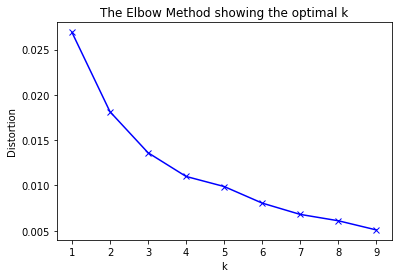

In [18]:
x=boston_venues['Venue Latitude']
y=boston_venues['Venue Longitude']
plt.plot()
X = np.array(list(zip(x, y))).reshape(len(x), 2)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#code from https://pythonprogramminglanguage.com/kmeans-elbow-method/

In [19]:
# set number of clusters
kclusters = 4
boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 3, 0, 1, 0, 0, 1, 1],
      dtype=int32)

In [20]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
boston_merged = Boston_LonLat
# merge boston_grouped with boston_data to add latitude/longitude for each neighborhood
boston_merged = boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
# check the last columns!
boston_merged.dropna(subset=['Cluster Labels'], inplace=True)
boston_merged['Cluster Labels'] =boston_merged['Cluster Labels'].astype('int')
boston_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Boston,Leather District,42.347960,-71.056410,2,Spa,Wine Bar,Gift Shop,Discount Store,Dive Bar,Dry Cleaner,Electronics Store,Event Space,Farmers Market,Fish Market
2,Boston,Back Bay,42.350266,-71.080978,1,Sporting Goods Shop,Hotel,Cosmetics Shop,Clothing Store,Salon / Barbershop,Pet Store,Furniture / Home Store,Men's Store,Women's Store,Plaza
3,Boston,Bay Village,42.350150,-71.065190,1,Theater,Hotel,Hotel Bar,Performing Arts Venue,Comedy Club,Smoke Shop,Gym,Lounge,Movie Theater,Event Space
4,Boston,Downtown,42.355300,-71.055280,1,Park,Hotel,Pub,Clothing Store,Gym / Fitness Center,Shoe Store,Gift Shop,Office,Department Store,Cycle Studio
6,Boston,Fenway,42.332670,-71.097910,0,Intersection,Liquor Store,Metro Station,Bike Rental / Bike Share,Gift Shop,Dive Bar,Dry Cleaner,Electronics Store,Event Space,Farmers Market


In [21]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Neighborhood'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=400,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)
map_clusters

## Examining the Clusters 

In [22]:
cluster0=boston_merged.loc[boston_merged['Cluster Labels'] == 0, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]
profile0=cluster0.drop(columns=['Neighborhood','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'])
profile0=profile0.rename(columns={'1st Most Common Venue':'Cluster 0 Venues'}).reset_index()
profile0.drop(columns=['index'])

,Cluster 0 Venues
0,Intersection
1,Intersection
2,Intersection
3,Intersection


In [23]:
cluster1=boston_merged.loc[boston_merged['Cluster Labels'] == 1, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]
profile1=cluster1.drop(columns=['Neighborhood','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'])
profile1=profile1.rename(columns={'1st Most Common Venue':'Cluster 1 Venues'}).reset_index()
profile1.drop(columns=['index'])

,Cluster 1 Venues
0,Sporting Goods Shop
1,Theater
2,Park
3,Pub
4,Hotel Bar
5,Hotel
6,Pub
7,Boutique
8,Historic Site
9,Yoga Studio


In [24]:
cluster2=boston_merged.loc[boston_merged['Cluster Labels'] == 2, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]
profile2=cluster2.drop(columns=['Neighborhood','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'])
profile2=profile2.rename(columns={'1st Most Common Venue':'Cluster 3 Venues'}).reset_index()
profile2.drop(columns=['index'])

,Cluster 3 Venues
0,Spa
1,Spa


In [25]:
cluster3=boston_merged.loc[boston_merged['Cluster Labels'] == 3, boston_merged.columns[[1] + list(range(5, boston_merged.shape[1]))]]
profile3=cluster3.drop(columns=['Neighborhood','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'])
profile3=profile3.rename(columns={'1st Most Common Venue':'Cluster 4 Venues'}).reset_index()
profile3.drop(columns={'index'})

,Cluster 4 Venues
0,Gas Station


In [26]:
profile=pd.concat([profile0,profile1,profile2,profile3],axis=1)
profile=profile.drop(columns=['index'])
profile = profile.replace(np.nan, '', regex=True)
profile

,Cluster 0 Venues,Cluster 1 Venues,Cluster 3 Venues,Cluster 4 Venues
0,Intersection,Sporting Goods Shop,Spa,Gas Station
1,Intersection,Theater,Spa,
2,Intersection,Park,,
3,Intersection,Pub,,
4,,Hotel Bar,,
5,,Hotel,,
6,,Pub,,
7,,Boutique,,
8,,Historic Site,,
9,,Yoga Studio,,


## Visualize the Data by Creating a Choropleth Map

In [27]:
reset_venues=getNearbyVenues(names=Boston_LonLat['Neighborhood'],latitudes=Boston_LonLat['Latitude'],longitudes=Boston_LonLat['Longitude'])
print(boston_venues.shape)
reset_venues=reset_venues.rename(columns={'Venue Category':'VCategory'})

Jamaica Plain
Leather District
Back Bay
Bay Village
Downtown
Roxbury
Fenway
Chinatown
West Roxbury
Beacon Hill
Roslindale
North End
East Boston
Brighton
Mission Hill
Dorchester
Mattapan
Longwood Medical Area
South End
South Boston
Charlestown
South Boston Waterfront
Harbor Islands
Hyde Park
West End
Allston
(285, 7)


In [28]:
want=['African Restaurant','American Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop', 'Belgian Restaurant', 'Bistro', 
      'Brazilian Restaurant', 'Breakfast Spot', 'Bubble Tea Shop','Burger Joint', 'Burrito Place', 'Café', 'Chinese Restaurant',
      'Chocolate Shop' 'Coffee Shop', 'Convenience Store','Comfort Food Restaurant', 'Dessert Shop', 'Dim Sum Restaurant', 'Diner', 
      'Donut Shop', 'Dumpling Restaurant', 'Falafel Restaurant', 'Fast Food Restaurant', 'Fish & Chips','Frozen Yogurt Shop','Food', 
      'French Restaurant', 'Fried Chicken Joint', 'Gastropub', 'Greek Restaurant','Gourmet Shop', 'Grocery','Hot Dog Joint', 
      'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant', 'Japanese Restaurant', 'Korean Restaurant', 
      'Latin American Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 'New American Restaurant', 'Pizza Place', 
      'Restaurant', 'Salad Place', 'Sandwich Place', 'Seafood Restaurant','Szechuan Restaurant', 'Southern / Soul Food Restaurant', 
      'Steakhouse', 'Street Food Gathering', 'Sushi Restaurant', 'Taco Place', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant', 
      'Vietnamese Restaurant']
all_venues=reset_venues.VCategory.array
rest_venues=list(set(all_venues) - set(want))
rest_venues

['Outdoor Sculpture',
 'Hotel',
 'Library',
 'Bed & Breakfast',
 'Bar',
 'Sporting Goods Shop',
 'Bank',
 'Irish Pub',
 'Wine Bar',
 'Electronics Store',
 'Cosmetics Shop',
 'Gym',
 'Pharmacy',
 'Art Museum',
 'Kids Store',
 'Planetarium',
 'Noodle House',
 'Pet Store',
 'Science Museum',
 "Women's Store",
 'Golf Course',
 'Fish & Chips Shop',
 'Boutique',
 'Ski Chalet',
 'Market',
 'Gift Shop',
 'Used Bookstore',
 'Gym / Fitness Center',
 'Brewery',
 'History Museum',
 'Pub',
 'Tea Room',
 'Other Repair Shop',
 'Juice Bar',
 'Metro Station',
 'Spa',
 'Business Service',
 'Comedy Club',
 'Cocktail Bar',
 'Boxing Gym',
 'Food & Drink Shop',
 'Yoga Studio',
 'Health & Beauty Service',
 'Platform',
 'Hockey Arena',
 'Zoo Exhibit',
 'Dry Cleaner',
 'Hotel Bar',
 'Tour Provider',
 'Hostel',
 'Intersection',
 'Club House',
 'Bus Line',
 'Fish Market',
 'Automotive Shop',
 'Park',
 'Lounge',
 'Board Shop',
 'Grocery Store',
 'Music Venue',
 'Movie Theater',
 'Shopping Mall',
 'Optical Shop',


In [29]:
pop_venues=reset_venues[~reset_venues.VCategory.str.contains('Planetarium')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Wine Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Scenic Lookout')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Market')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Boat or Ferry')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Discount Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Farmers Market')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Bed & Breakfast')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Nail Salon')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Tennis Court')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Used Bookstore')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Zoo Exhibit')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Science Museum')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Smoke Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Bike Rental / Bike Share')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Concert Hall')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Business Service')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Plaza')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Playground')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Performing Arts Venue')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('History Museum')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Museum')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Boxing Gym')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Gym')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Board Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Department Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Monument / Landmark')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Hotel Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Wine Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Hockey Arena')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Beer Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Art Museum')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Intersection')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Skate Park')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Irish Pub')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Food Truck')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Sculpture Garden')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Dry Cleaner')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Automotive Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Beach')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Music Venue')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Office')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Salon / Barbershop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Bus Line')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Brewery')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Pub')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Historic Site')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Metro Station')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Ski Chalet')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Tunnel')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Cosmetics Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Athletics & Sports')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Hostel')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Electronics Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Dive Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Spa')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Comedy Club')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Lounge')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Rock Club')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Kids Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Tea Room')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Gas Station')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Bank')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Pet Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Liquor Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Tour Provider')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Health & Beauty Service')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Beer Garden')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Shoe Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Record Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Library')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Furniture / Home Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Platform')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Yoga Studio')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Food & Drink Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Outdoor Sculpture')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Accessories Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains("Men's Store")]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Park')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Club House')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Event Space')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Pharmacy')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Other Repair Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Rental Car Location')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Clothing Store')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Cycle Studio')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Gym / Fitness Center')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Sporting Goods Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Theater')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Flower Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Hotel')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Sports Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Gift Shop')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Golf Course')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains("Women's Store")]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Cocktail Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Boutique')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Juice Bar')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Movie Theater')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Shopping Mall')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Fish Market')]
pop_venues=pop_venues[~pop_venues.VCategory.str.contains('Optical Shop')]
pop_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,VCategory
0,Leather District,42.347960,-71.056410,La Colombe Torrefaction,42.350423,-71.056837,Café
1,Leather District,42.347960,-71.056410,South Street Diner,42.349715,-71.057719,Diner
2,Leather District,42.347960,-71.056410,Figaro's,42.350860,-71.058259,Sandwich Place
4,Leather District,42.347960,-71.056410,O Ya,42.351502,-71.056763,Sushi Restaurant
6,Leather District,42.347960,-71.056410,Troquet On South,42.351430,-71.057348,French Restaurant
7,Leather District,42.347960,-71.056410,Hei La Moon,42.351067,-71.058651,Dim Sum Restaurant
8,Back Bay,42.350266,-71.080978,Gre.Co,42.349920,-71.081633,Greek Restaurant
9,Back Bay,42.350266,-71.080978,sweetgreen,42.349933,-71.078625,Salad Place
14,Back Bay,42.350266,-71.080978,Amorino,42.349619,-71.082754,Ice Cream Shop
15,Back Bay,42.350266,-71.080978,Ben & Jerry's,42.350303,-71.078966,Ice Cream Shop


In [30]:
food_venues=pop_venues.groupby('Neighborhood').count()
food_venues=food_venues.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','VCategory'])
food_venues=food_venues.reset_index()
food_venues=food_venues.rename(columns={'Venue':'Total'})
food_venues=food_venues.sort_values(by='Total', ascending=False)

In [31]:
food_venues

,Neighborhood,Total
13,Longwood Medical Area,60
7,Downtown,56
1,Back Bay,52
2,Bay Village,49
0,Allston,34
16,North End,26
3,Beacon Hill,21
15,Mission Hill,15
18,South End,13
17,South Boston,13


In [32]:
# download countries geojson file
!wget --quiet http://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson -O my_boston.json



print('GeoJSON file downloaded!')
my_map = './my_boston.json'


GeoJSON file downloaded!


In [33]:
# create a numpy array of length 6 and has linear spacing from the minium total venues to the maximum total venues
threshold_scale = np.linspace(0,60,6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
m = folium.Map(location=[42.3602534, -71.0582912], zoom_start=13)
m.choropleth(
    geo_data=my_map,
    data=food_venues,
    columns=['Neighborhood', 'Total'],
    key_on='feature.properties.Name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number of Restaurant Venues',
    reset=True
)  
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Neighborhood'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=400,
        popup=label,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(m)
m